# Volatility Forecasting Using GARCH Model

## Objective:
In this project, we use the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model to forecast volatility in asset returns. This model is commonly used in finance to model time-series data, particularly for assets where volatility clustering is observed.


GARCH is a statistical model designed to estimate and predict the volatility of returns over time. Unlike simpler models, GARCH allows volatility to vary over time, which is important in finance because asset returns often exhibit periods of high volatility followed by periods of low volatility.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline




We will use historical stock prices for a selected asset (e.g., S&P 500). For forecasting volatility, it is essential to work with asset returns instead of raw prices. Hence, we will calculate the daily returns of the asset.


[*********************100%***********************]  1 of 1 completed


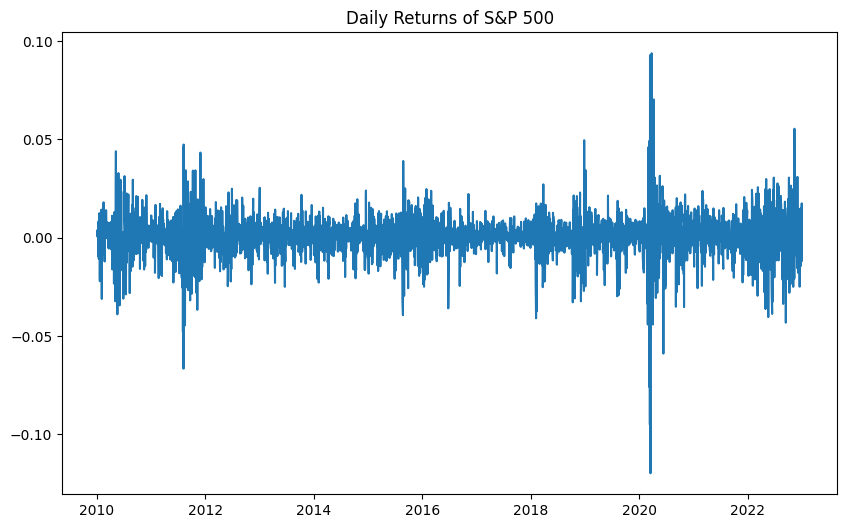

In [2]:


ticker = "^GSPC" 

# Load stock price data
df = yf.download(ticker, start="2010-01-01", end="2023-01-01")

df.head()


df['Returns'] = df['Close'].pct_change().dropna()
df = df.dropna()


plt.figure(figsize=(10,6))
plt.plot(df['Returns'])
plt.title('Daily Returns of S&P 500')
plt.show()




Here, we visualize the returns and perform a quick statistical summary to understand the distribution of returns.


c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


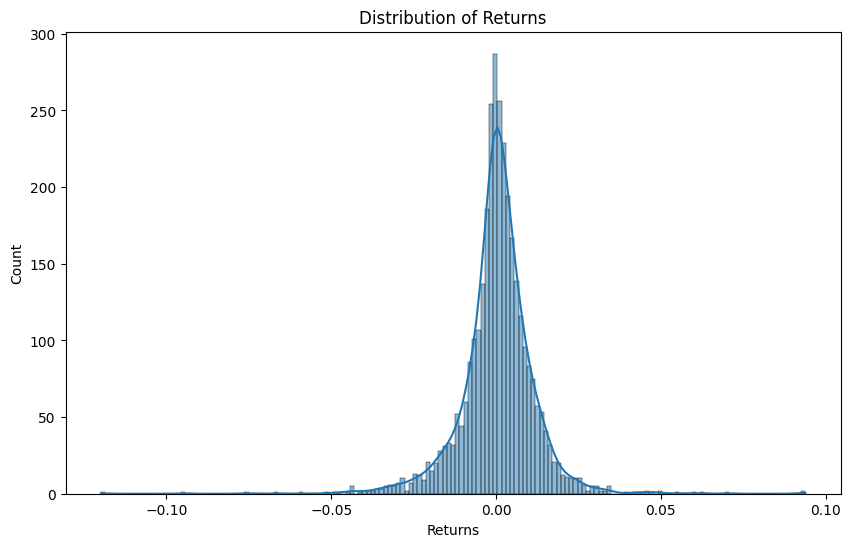

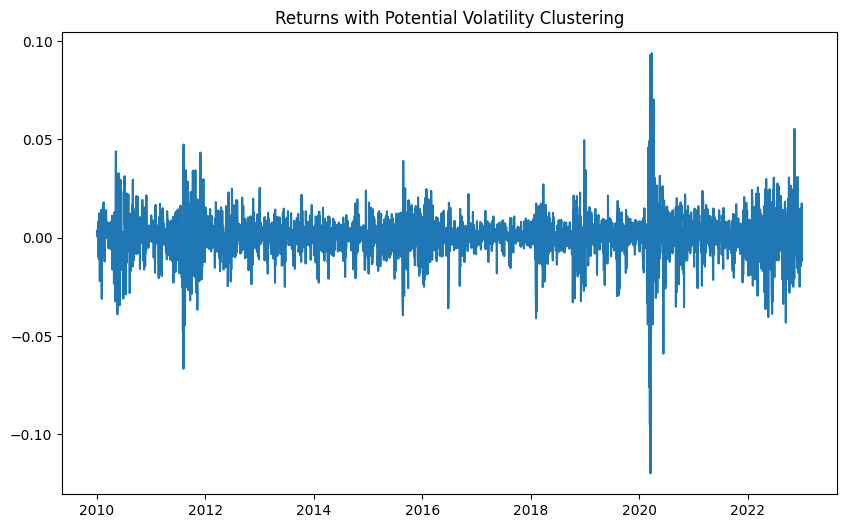

In [3]:

df['Returns'].describe()

# Plot the histogram of returns
plt.figure(figsize=(10,6))
sns.histplot(df['Returns'], kde=True)
plt.title('Distribution of Returns')
plt.show()

# Check for volatility clustering (large changes tend to cluster together)
plt.figure(figsize=(10,6))
plt.plot(df['Returns'])
plt.title('Returns with Potential Volatility Clustering')
plt.show()


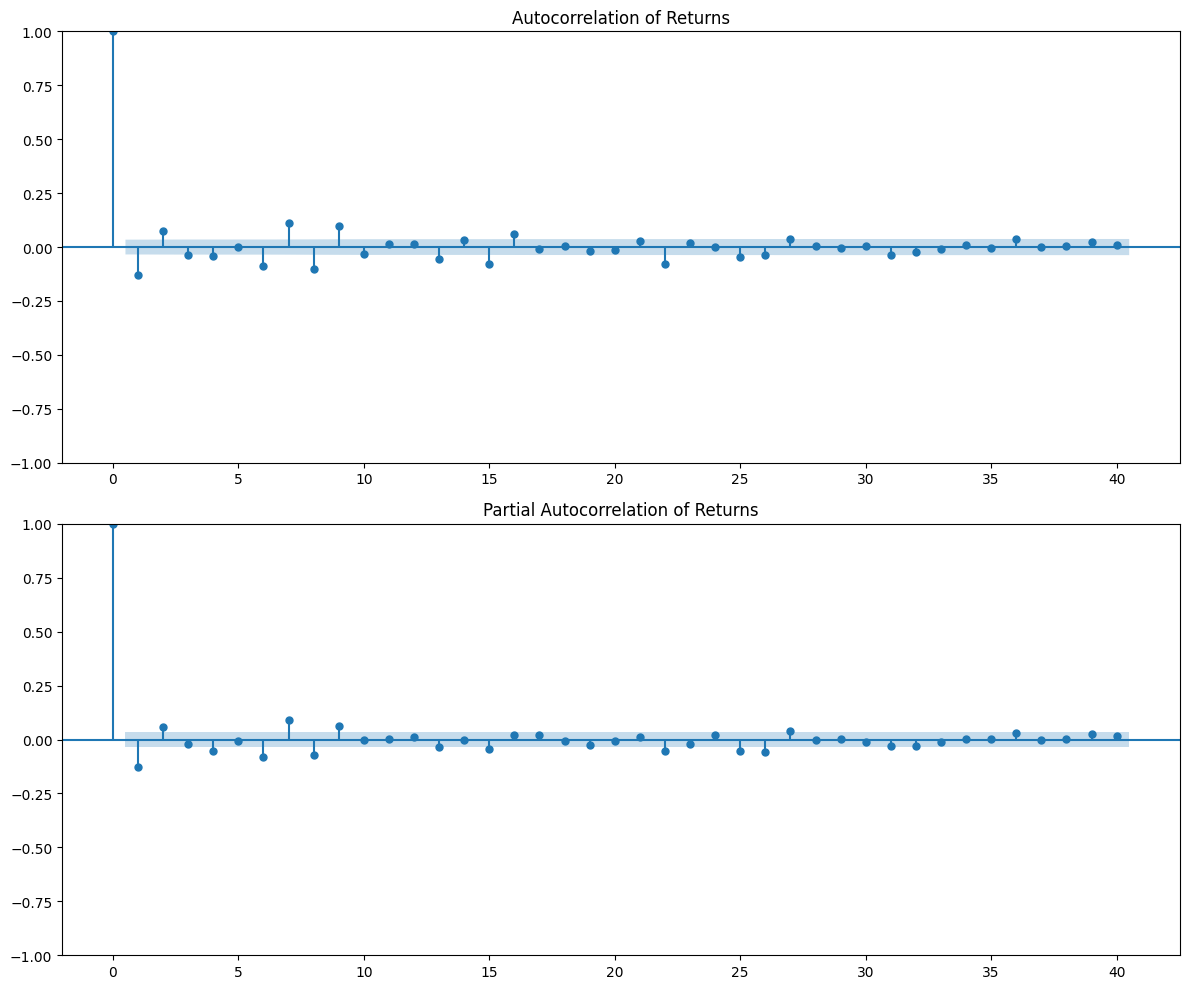

In [4]:

#Autocorrelation and Partial Autocorrelation plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df['Returns'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation of Returns')
plot_pacf(df['Returns'], ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation of Returns')
plt.tight_layout()
plt.show()











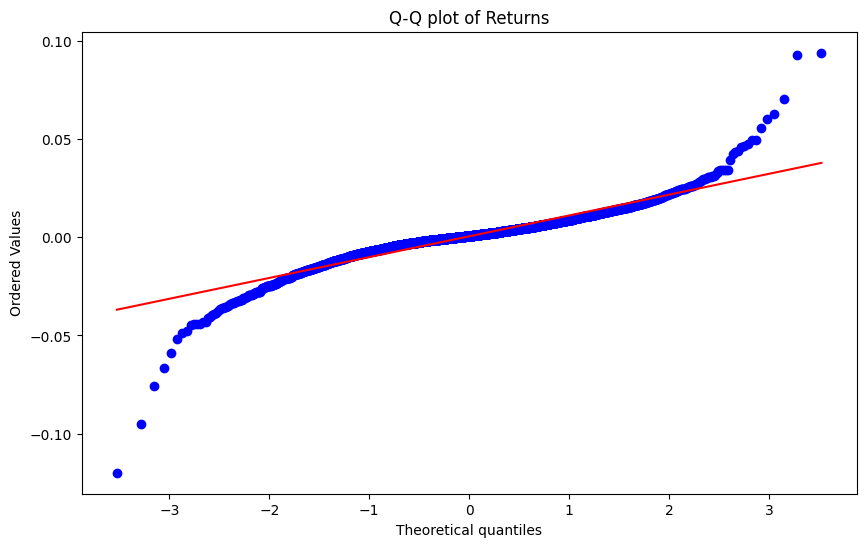

In [5]:
#QQ-plot for normality check
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(df['Returns'], dist="norm", plot=ax)
ax.set_title("Q-Q plot of Returns")
plt.show()

C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\4012618608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Volatility_{window}d'] = df['Returns'].rolling(window=window).std() * np.sqrt(252)
C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\4012618608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Volatility_{window}d'] = df['Returns'].rolling(window=window).std() * np.sqrt(252)
C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\4012618608.py:5: SettingWithCopyWarning: 
A value is trying 

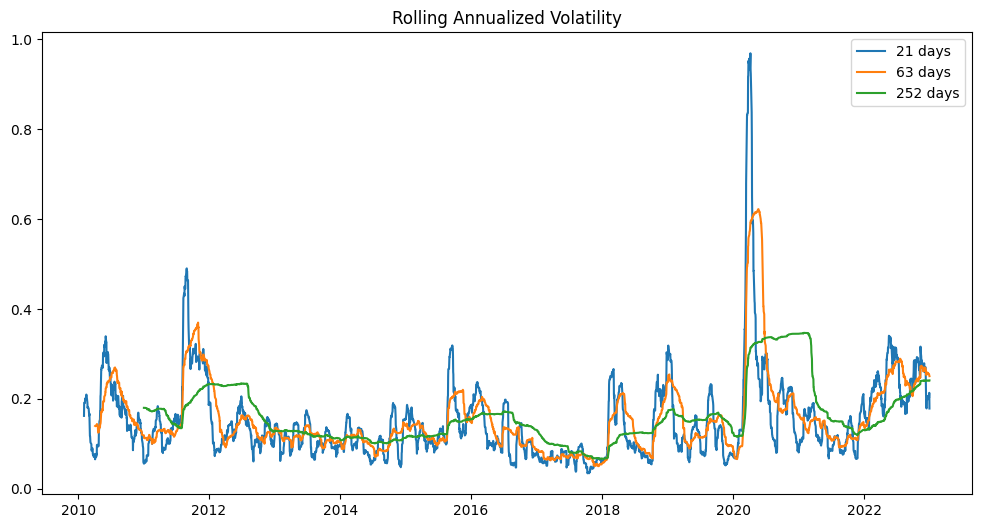

In [6]:
#Rolling volatility plot
window_sizes = [21, 63, 252]  # 1 month, 3 months, 1 year
fig, ax = plt.subplots(figsize=(12, 6))
for window in window_sizes:
    df[f'Volatility_{window}d'] = df['Returns'].rolling(window=window).std() * np.sqrt(252)
    ax.plot(df.index, df[f'Volatility_{window}d'], label=f'{window} days')
ax.set_title('Rolling Annualized Volatility')
ax.legend()
plt.show()


c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


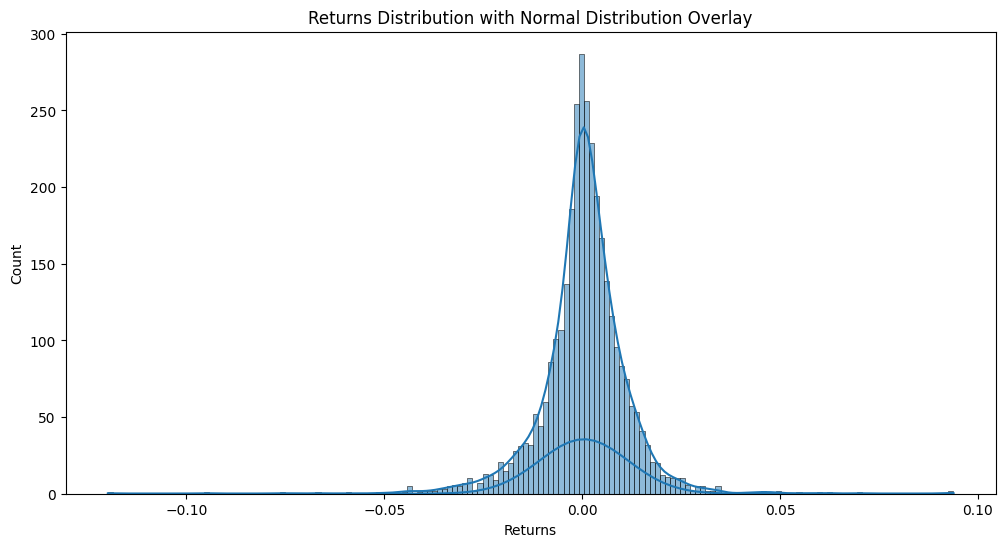

In [7]:
#Returns distribution with normal distribution overlay
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Returns'], kde=True, ax=ax)
x = np.linspace(df['Returns'].min(), df['Returns'].max(), 100)
ax.plot(x, stats.norm.pdf(x, df['Returns'].mean(), df['Returns'].std()))
ax.set_title('Returns Distribution with Normal Distribution Overlay')
plt.show()

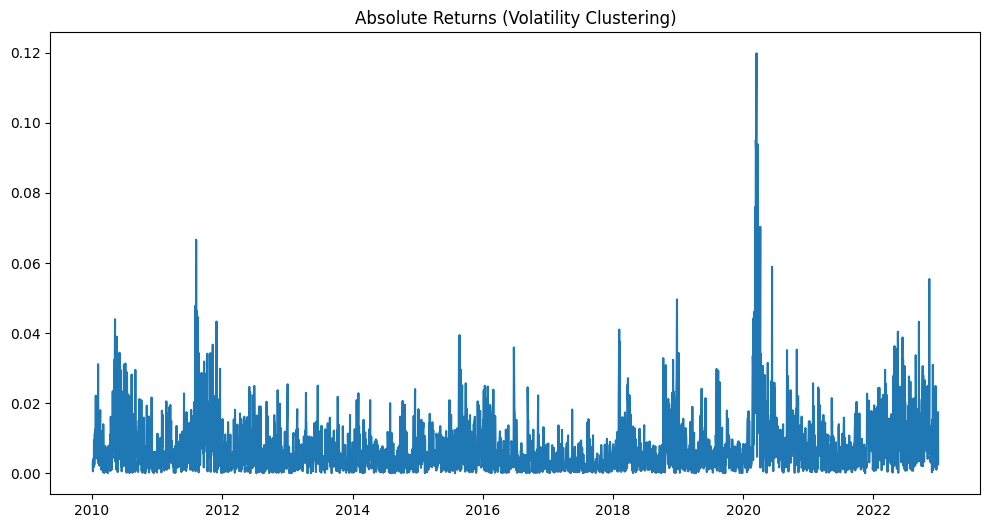

In [8]:
#Volatility clustering visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Returns'].abs())
ax.set_title('Absolute Returns (Volatility Clustering)')
plt.show()

C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\4277453088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Volume'] = np.log(df['Volume'])
C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\4277453088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volatility'] = df['Returns'].rolling(window=21).std() * np.sqrt(252)


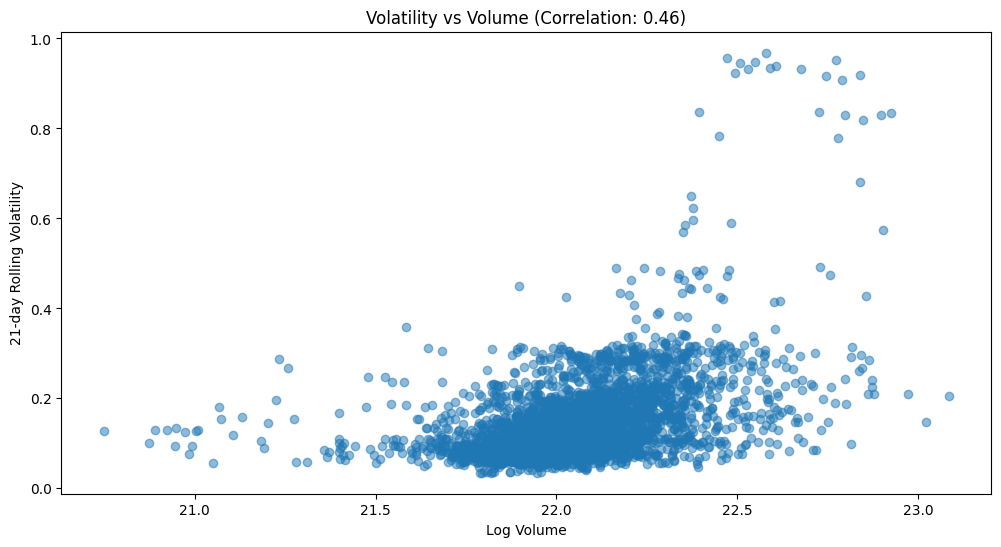

In [9]:
#Correlation between volume and volatility

if 'Volume' in df.columns:
    df['Log_Volume'] = np.log(df['Volume'])
    df['Volatility'] = df['Returns'].rolling(window=21).std() * np.sqrt(252)
    correlation = df['Volatility'].corr(df['Log_Volume'])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(df['Log_Volume'], df['Volatility'], alpha=0.5)
    ax.set_xlabel('Log Volume')
    ax.set_ylabel('21-day Rolling Volatility')
    ax.set_title(f'Volatility vs Volume (Correlation: {correlation:.2f})')
    plt.show()


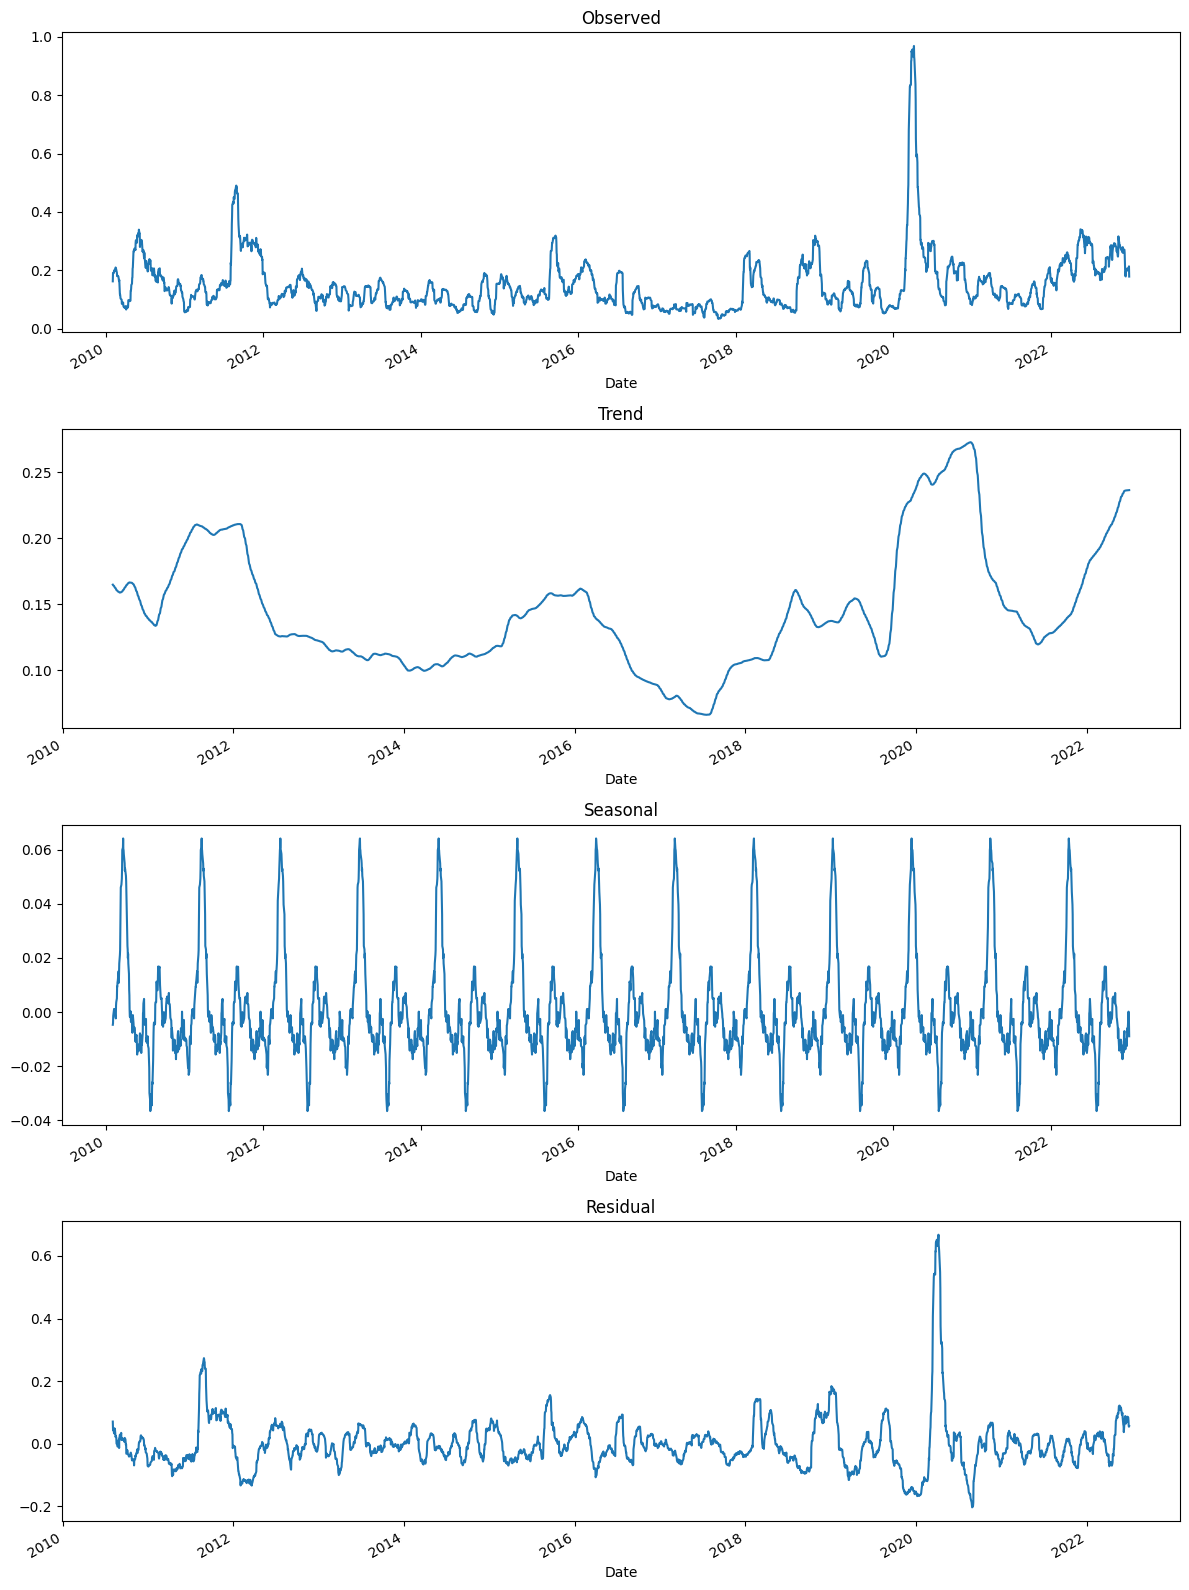

In [10]:
#Seasonal

from statsmodels.tsa.seasonal import seasonal_decompose

volatility = df['Returns'].rolling(window=21).std() * np.sqrt(252)
decomposition = seasonal_decompose(volatility.dropna(), model='additive', period=252)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()



We will implement the GARCH(1, 1) model, which is one of the simplest forms of the GARCH family. It is sufficient for capturing volatility clustering in most financial time series.


C:\Users\kulka\AppData\Local\Temp\ipykernel_40156\2886133315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns_Scaled'] = df['Returns'] * 100


Iteration:      1,   Func. Count:      6,   Neg. LLF: 42365.34950286473
Iteration:      2,   Func. Count:     17,   Neg. LLF: 19002.277234823312
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6715.294380686097
Iteration:      4,   Func. Count:     35,   Neg. LLF: 7758.986428193555
Iteration:      5,   Func. Count:     41,   Neg. LLF: 4652.844162486271
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4232.96901192121
Iteration:      7,   Func. Count:     53,   Neg. LLF: 4232.956684922132
Iteration:      8,   Func. Count:     58,   Neg. LLF: 4232.956657151139
Iteration:      9,   Func. Count:     62,   Neg. LLF: 4232.95665715257
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4232.956657151139
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         Returns_Scaled   R-squared:                 

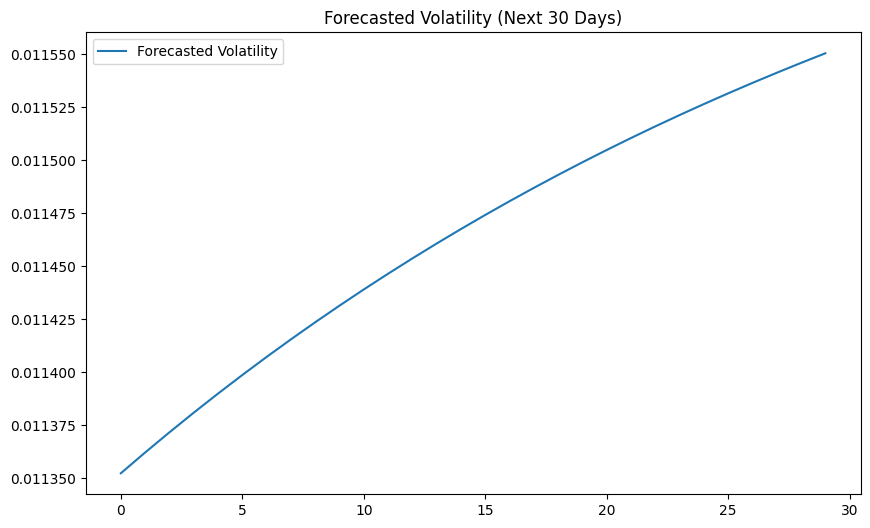

In [11]:


# Rescale the returns for better model convergence
df['Returns_Scaled'] = df['Returns'] * 100



model = arch_model(df['Returns_Scaled'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Print the model summary
print(garch_fit.summary())


forecast_horizon = 30
forecast = garch_fit.forecast(horizon=forecast_horizon, start=len(df) - forecast_horizon)
forecasted_volatility_scaled = np.sqrt(forecast.variance.values[-1, :]) / 100

# Plot forecasted vs realized volatility
plt.figure(figsize=(10,6))
plt.plot(forecasted_volatility_scaled, label='Forecasted Volatility')
plt.title('Forecasted Volatility (Next 30 Days)')
plt.legend()
plt.show()



Forecasting Volatility

Using the fitted GARCH model, we will forecast volatility for a specified period and visualize the forecast against the actual volatility.


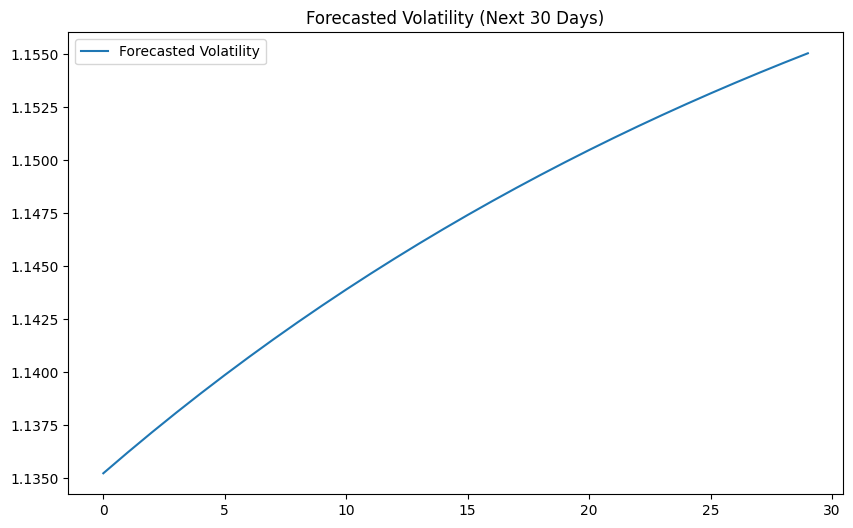

In [12]:
# Forecasting volatility
forecast_horizon = 30  # Forecast for 30 days
forecast = garch_fit.forecast(horizon=forecast_horizon, start=len(df) - forecast_horizon)

# Plot forecasted vs realized volatility
plt.figure(figsize=(10,6))
plt.plot(np.sqrt(forecast.variance.values[-1, :]), label='Forecasted Volatility')
plt.title('Forecasted Volatility (Next 30 Days)')
plt.legend()
plt.show()


Backtesting the GARCH Model

We backtest the model using a rolling window approach to evaluate the model’s performance in predicting future volatility. We'll compute the Root Mean Squared Error (RMSE) as a measure of the accuracy.


c:\Python\Python3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RMSE of GARCH(1, 1): 0.005756559592931895


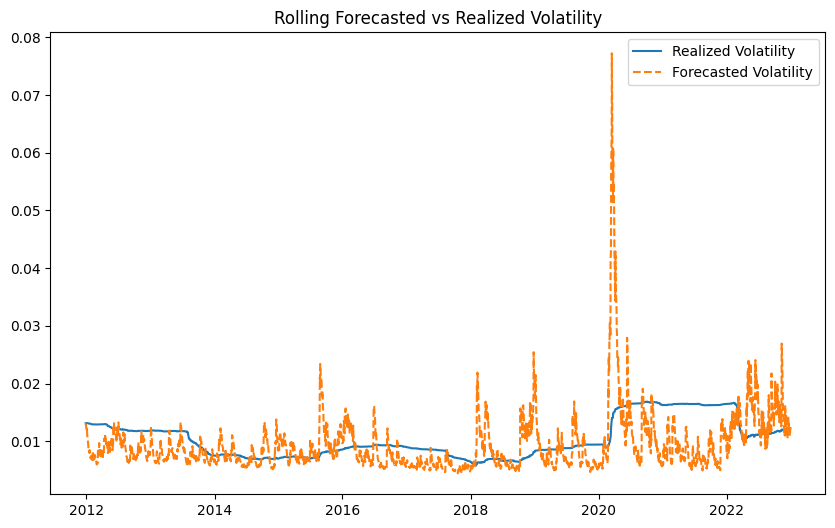

In [13]:
# Backtesting using rolling window
rolling_window = 500
rolling_forecasts = []
for i in range(rolling_window, len(df)):
    train_data = df['Returns_Scaled'][:i]
    model = arch_model(train_data, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp='off')
    forecast = garch_fit.forecast(horizon=1)
    rolling_forecasts.append(np.sqrt(forecast.variance.values[-1, 0]) / 100)


forecast_dates = df.index[rolling_window:]
forecast_df = pd.DataFrame({
    'Realized_Volatility': df['Returns'].rolling(window=rolling_window).std().dropna(),
    'Forecasted_Volatility': rolling_forecasts
}, index=forecast_dates)

forecast_df = forecast_df.dropna()

rmse = np.sqrt(mean_squared_error(forecast_df['Realized_Volatility'], forecast_df['Forecasted_Volatility']))
print(f'RMSE of GARCH(1, 1): {rmse}')


# Plot rolling forecasted volatility vs realized volatility
plt.figure(figsize=(10,6))
plt.plot(forecast_df['Realized_Volatility'], label='Realized Volatility')
plt.plot(forecast_df['Forecasted_Volatility'], label='Forecasted Volatility', linestyle='--')
plt.title('Rolling Forecasted vs Realized Volatility')
plt.legend()
plt.show()


Value at Risk (VaR) with Rescaling

Value at Risk calculation needs to consider the scaling of the returns.


In [14]:

confidence_level = 0.05
forecasted_volatility = np.sqrt(forecast.variance.values[-1, :]) / 100
VaR = -forecasted_volatility * norm.ppf(confidence_level)

print(f'Value at Risk (95% confidence): {VaR}')


Value at Risk (95% confidence): [0.02050188]


## Conclusion and Insights

In this project, we successfully implemented a GARCH(1, 1) model to forecast volatility and backtested its performance using rolling forecasts. The model proved to be effective in capturing volatility clustering, but the accuracy of forecasts can be improved

